In [68]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import psycopg2
from dotenv import load_dotenv
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
# test connection
# Load environment variables from .env
load_dotenv()

# Connect to the database
try:
    connection = psycopg2.connect(
    user=os.getenv("USER"),
    password=os.getenv("PASSWORD"),
    host=os.getenv("HOST"),
    port=os.getenv("PORT"),
    dbname=os.getenv("DBNAME"),
)
    print("Connection successful!")
    
    # Create a cursor to execute SQL queries
    cursor = connection.cursor()
    
    # Example query
    cursor.execute("SELECT NOW();")
    result = cursor.fetchone()
    print("Current Time:", result)

    # Close the cursor and connection
    cursor.close()
    connection.close()
    print("Connection closed.")

except Exception as e:
    print(f"Failed to connect: {e}")

Connection successful!
Current Time: (datetime.datetime(2026, 2, 17, 11, 44, 37, 139837, tzinfo=datetime.timezone.utc),)
Connection closed.


In [70]:
# download table from Supabase
load_dotenv()
conn = psycopg2.connect(
    user=os.getenv("USER"),
    password=os.getenv("PASSWORD"),
    host=os.getenv("HOST"),
    port=os.getenv("PORT"),
    dbname=os.getenv("DBNAME")
)

final_table = pd.read_sql("SELECT * FROM core.final_table", conn)
conn.close()

e:\users\agabekov_ai\AppData\Local\Temp\ipykernel_5472\2303550243.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  final_table = pd.read_sql("SELECT * FROM core.final_table", conn)


In [7]:
del final_table

In [71]:

final_table = final_table.sort_values(by = ['year', 'month'])
final_table.insert(0, 'date', pd.to_datetime(final_table[['year','month']].assign(day = 1)))
final_table.head()

,date,year,month,bmw_market_share_revenue,hyundai_market_share_revenue,lada_market_share_revenue,bmw_market_share_units,hyundai_market_share_units,lada_market_share_units,bmw_price_index_vs_market,hyundai_price_index_vs_market,lada_price_index_vs_market,market_mom_growth_rel,bmw_mom_growth_rel,hyundai_mom_growth_rel,lada_mom_growth_rel
1,2021-01-01,2021.0,1.0,50.5,43.5,6.0,43.5,30.9,25.6,116.3,140.5,23.4,-12.2,0.0,0.0,-20.1
5,2021-02-01,2021.0,2.0,38.7,54.6,6.7,34.5,37.6,27.9,112.0,145.2,24.1,-4.3,0.0,36.4,0.0
8,2021-03-01,2021.0,3.0,63.5,27.6,8.9,48.6,21.7,29.7,130.8,127.2,29.8,-6.9,-8.3,24.1,3.3
10,2021-04-01,2021.0,4.0,51.4,44.4,4.2,50.9,31.6,17.5,100.9,140.6,23.9,4.5,0.0,0.0,0.0
12,2021-05-01,2021.0,5.0,52.4,41.0,6.6,44.7,29.2,26.0,117.0,140.3,25.5,0.0,5.3,-38.4,2.7


In [96]:
# create viz DF
tab_revenue = final_table.iloc[:, [0,3,4,5]]
tab_qnt = final_table.iloc[:, [0,6,7,8]]
tab_price = final_table.iloc[:, [0,9,10,11]]
tab_revenue.head()

,date,bmw_market_share_revenue,hyundai_market_share_revenue,lada_market_share_revenue
1,2021-01-01,50.5,43.5,6.0
5,2021-02-01,38.7,54.6,6.7
8,2021-03-01,63.5,27.6,8.9
10,2021-04-01,51.4,44.4,4.2
12,2021-05-01,52.4,41.0,6.6


In [97]:
# config DFs to long format and rename
df_list = [tab_revenue, tab_qnt, tab_price]
brand_list = ['BMW','Hyundai', 'Lada']
for i, df in enumerate(df_list):
    df.columns.values[[1,2,3]] = brand_list
    df_list[i] = df.melt(id_vars = 'date', var_name = 'Бренды', value_name = 'Доля, в %').sort_values(by = ['date', 'Бренды'])

tab_revenue, tab_qnt, tab_price = df_list


In [98]:
tab_revenue.head()

,date,Бренды,"Доля, в %"
0,2021-01-01,BMW,50.5
36,2021-01-01,Hyundai,43.5
72,2021-01-01,Lada,6.0
1,2021-02-01,BMW,38.7
37,2021-02-01,Hyundai,54.6


In [99]:
tab_qnt.head()

,date,Бренды,"Доля, в %"
0,2021-01-01,BMW,43.5
36,2021-01-01,Hyundai,30.9
72,2021-01-01,Lada,25.6
1,2021-02-01,BMW,34.5
37,2021-02-01,Hyundai,37.6


In [100]:
tab_price.head()

,date,Бренды,"Доля, в %"
0,2021-01-01,BMW,116.3
36,2021-01-01,Hyundai,140.5
72,2021-01-01,Lada,23.4
1,2021-02-01,BMW,112.0
37,2021-02-01,Hyundai,145.2


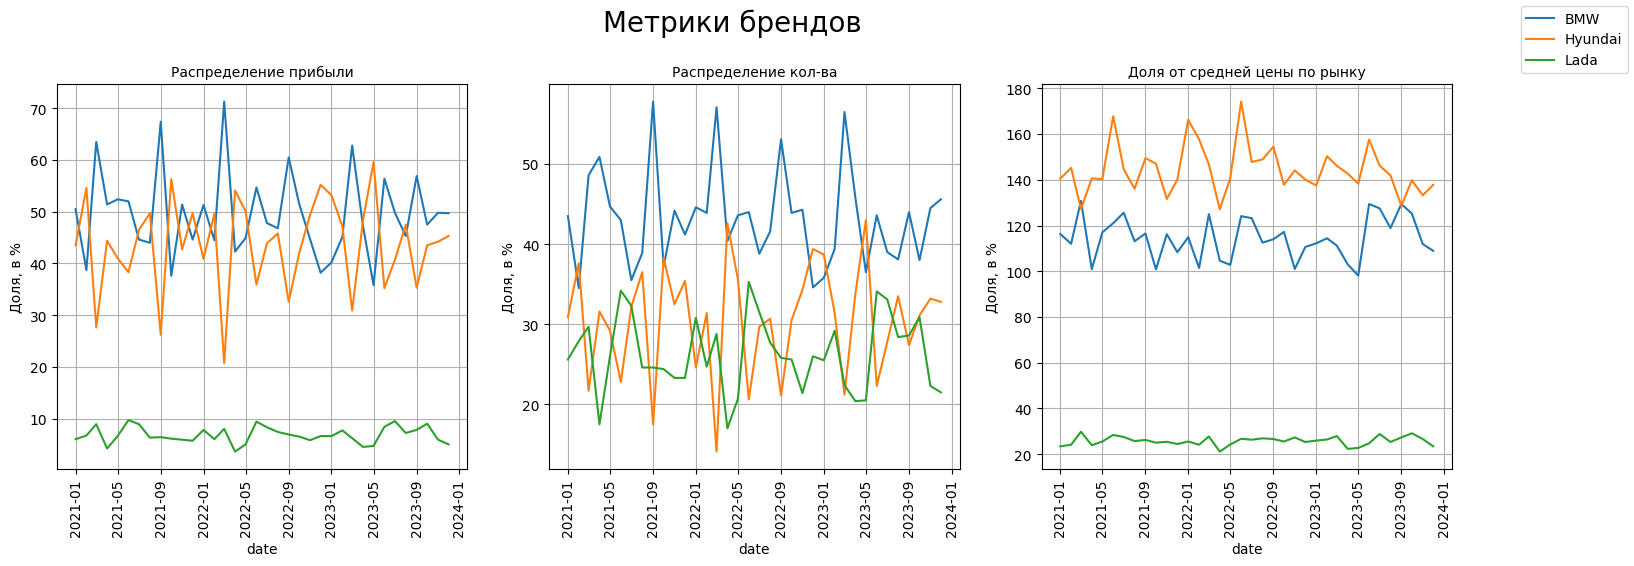

In [104]:
fig, ax = plt.subplots(1,3, figsize = (18,5)) # создаём фигуру, задаём ей структуру так, чтобы поместилось 3 графика с одной осью x и разными осями y

DFs = [tab_revenue, tab_qnt, tab_price]  # заводим список датафреймов
titles = ['Распределение прибыли', 'Распределение кол-ва', 'Доля от средней цены по рынку'] # заводим список названий

for i, (df, title) in enumerate(zip(DFs, titles)):   # enumerate каждой паре датафрейм-его название присваивает порядковый номер, назовём его i
    sns.lineplot(
        data = df,
        x = 'date',
        y = 'Доля, в %',
        hue = 'Бренды',
        ax = ax[i])
    ax[i].tick_params(axis = 'x', rotation = 90)
    ax[i].grid(True)
    ax[i].set_title(title, fontsize = 10)
    ax[i].legend_.remove()
fig.suptitle('Метрики брендов', y = 1.03, fontsize = 20)
lines = ax[0].get_lines()
labels = brand_list
fig.legend(lines, labels, loc = 'upper right')